In [107]:
import pandas as pd

In [108]:
# Import TensorFlow and load MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the data (train and test sets)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [110]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [111]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [112]:
y_train[0]

np.uint8(5)

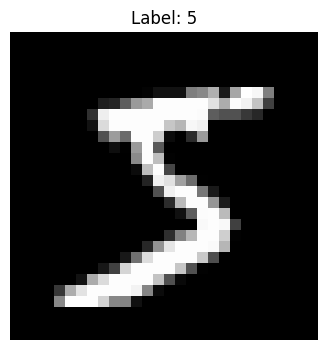

In [113]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

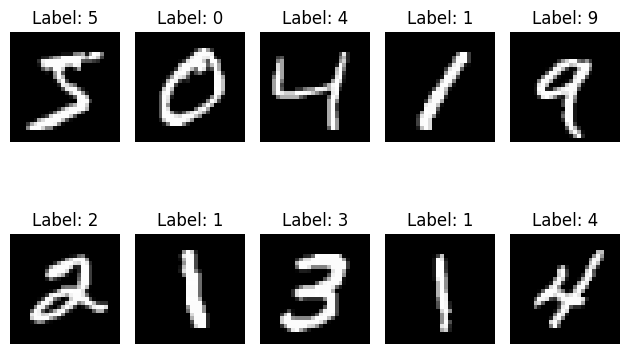

In [114]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()

In [128]:
X_train=tf.constant(X_train, dtype=tf.float32)/255.0
X_test=tf.constant(X_test, dtype=tf.float32)/255.0
y_train=tf.constant(y_train, dtype=tf.int32)
y_test=tf.constant(y_test, dtype=tf.int32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([60000, 28, 28]),
 TensorShape([10000, 28, 28]),
 TensorShape([60000]),
 TensorShape([10000]))

# Model 1 - Underfit

In [129]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model1.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5
  1/600 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5500 - loss: 1.8866

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6735 - loss: 1.4332 - val_accuracy: 0.7466 - val_loss: 1.1152
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7783 - loss: 0.9552 - val_accuracy: 0.8101 - val_loss: 0.8133
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8238 - loss: 0.7371 - val_accuracy: 0.8438 - val_loss: 0.6528
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.6115 - val_accuracy: 0.8603 - val_loss: 0.5540
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8630 - loss: 0.5315 - val_accuracy: 0.8721 - val_loss: 0.4896


In [133]:
model1.evaluate(X_test, y_test)

 73/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.5444

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8721 - loss: 0.4896


[0.4895615577697754, 0.8720999956130981]

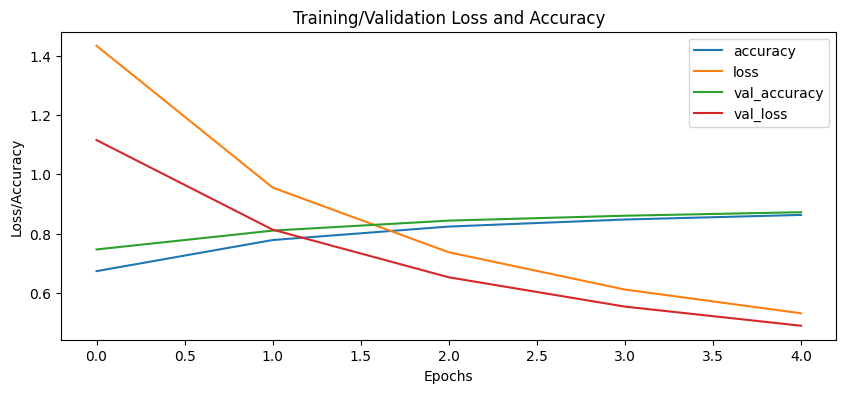

In [134]:
pd.DataFrame(model1.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

# Model 2 - Right Fit

In [148]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,618 (1.83 MB)

 Trainable params: 478,618 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6715 - loss: 0.9890 - val_accuracy: 0.8445 - val_loss: 0.5380
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8795 - loss: 0.4220 - val_accuracy: 0.9087 - val_loss: 0.3220
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9209 - loss: 0.2748 - val_accuracy: 0.9339 - val_loss: 0.2297
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9423 - loss: 0.2002 - val_accuracy: 0.9461 - val_loss: 0.1859
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9542 - loss: 0.1597 - val_accuracy: 0.9518 - val_loss: 0.1669


In [150]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9518 - loss: 0.1669


[0.16686290502548218, 0.9517999887466431]

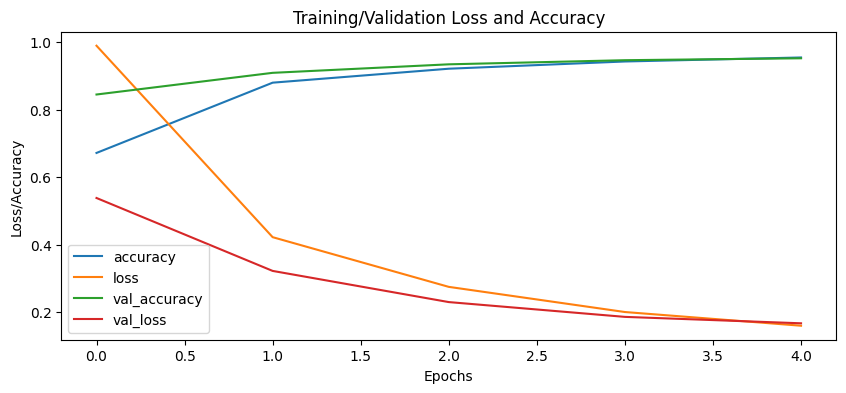

In [151]:
pd.DataFrame(model2.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

# Model 3 - Overfit

In [168]:
tf.random.set_seed(42)

model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model3.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 8192)           │     6,430,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,178,138 (195.23 MB)

 Trainable params: 51,178,138 (195.23 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/5


600/600 ━━━━━━━━━━━━━━━━━━━━ 302s 499ms/step - accuracy: 0.4467 - loss: 1.3801 - val_accuracy: 0.8384 - val_loss: 0.5471
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 297s 495ms/step - accuracy: 0.9023 - loss: 0.3718 - val_accuracy: 0.9252 - val_loss: 0.2807
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 325s 501ms/step - accuracy: 0.9384 - loss: 0.2405 - val_accuracy: 0.9279 - val_loss: 0.2596
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 301s 502ms/step - accuracy: 0.9532 - loss: 0.1807 - val_accuracy: 0.9545 - val_loss: 0.1923
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 297s 496ms/step - accuracy: 0.9624 - loss: 0.1458 - val_accuracy: 0.9549 - val_loss: 0.1781


In [170]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9549 - loss: 0.1781


[0.17814068496227264, 0.9549000263214111]

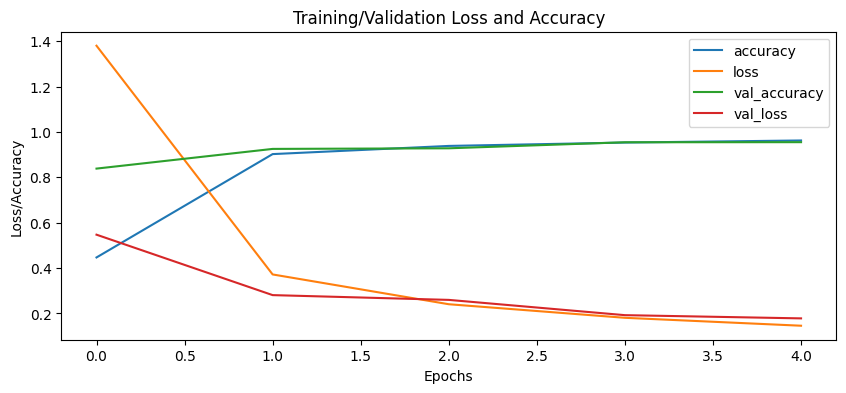

In [171]:
pd.DataFrame(model3.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()